In [26]:
import tensorflow as tf
import utils as u
import h5py
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
#from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline
import itertools

import keras 
from keras.models import load_model
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras import backend as K
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D,Activation,BatchNormalization,LeakyReLU
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam

In [2]:
data_folder = '../data'
file_name = 'HCAL_digi+rechit_occ.hdf5'
group = 'DigiTask_Occupancy_depth_depth1'

input_file=h5py.File(data_folder+"/"+file_name,'r+')

data_sample= np.array(input_file[group])


print data_sample.shape

data_sample=data_sample[:,:,26:58]

print data_sample.shape

(999, 72, 84)
(999, 72, 32)


Shape of regular image is:  (999, 72, 32)
Shape of dead image is:  (999, 72, 32)
Shape of hot image is:  (999, 72, 32)



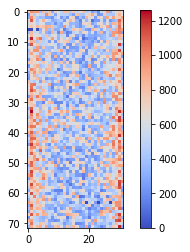

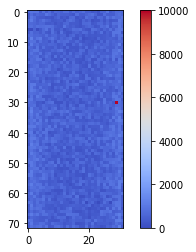

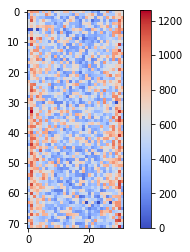

In [3]:
input_images=data_sample[:]
hotregion_image=[]
deadregion_image=[]

for k in input_images:
    a=np.random.randint(input_images.shape[2]-1)
    b=np.random.randint(input_images.shape[1]-1)

    xdim=(a,a+1)
    ydim=(b,b+1)
   
    hotregion_image.append( u.hotregion(k,xdim,ydim))
    deadregion_image.append(u.killregion(k,xdim,ydim))
       
    
hotregion_image=np.array(hotregion_image)
deadregion_image=np.array(deadregion_image)

print "Shape of regular image is: ",input_images.shape
print "Shape of dead image is: " ,deadregion_image.shape
print "Shape of hot image is: " ,hotregion_image.shape

print ''
im=plt.imshow(input_images[1],cmap=cm.coolwarm)
plt.colorbar()
plt.show()
plt.clf()

im=plt.imshow(hotregion_image[1],cmap=cm.coolwarm)
plt.colorbar()
plt.show()
plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
         #as opposed to plt.close which closes the window. If you are showing many images at a time without
         #closing the window it is better.

im=plt.imshow(deadregion_image[1],cmap=cm.coolwarm)
plt.colorbar()
plt.show()
plt.clf()
#input_image=np.reshape(input_image,(input_image.shape[0],input_image.shape[1]))


If you want to see the group of images

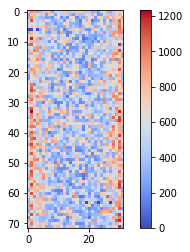

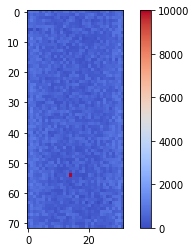

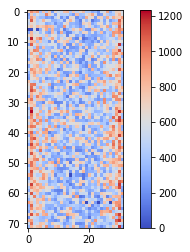

-----------------


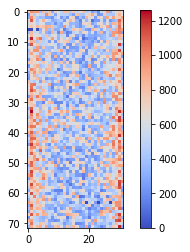

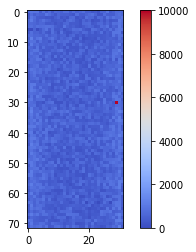

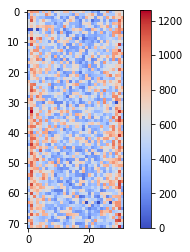

-----------------


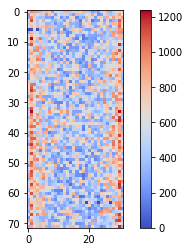

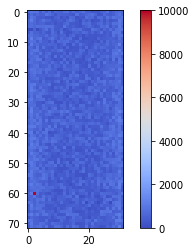

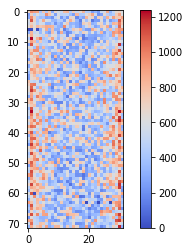

-----------------


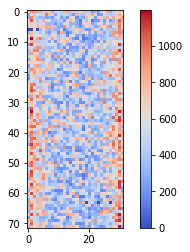

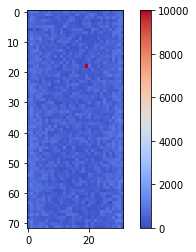

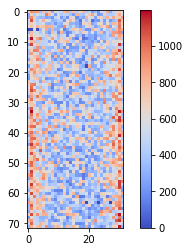

-----------------


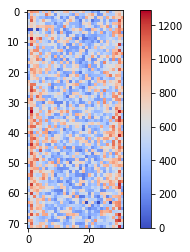

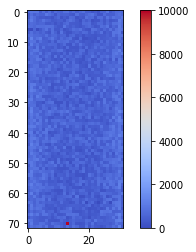

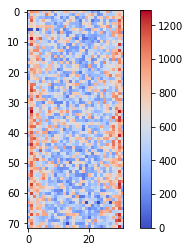

-----------------


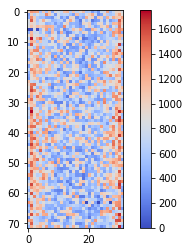

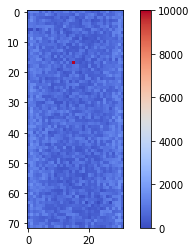

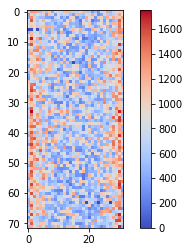

-----------------


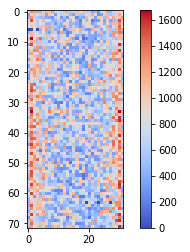

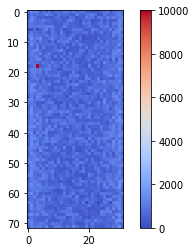

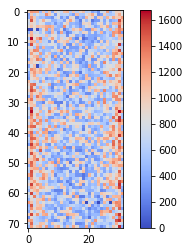

-----------------


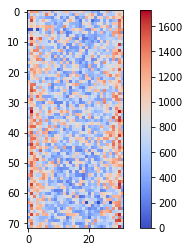

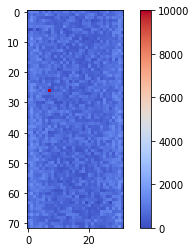

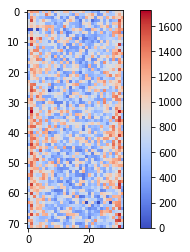

-----------------


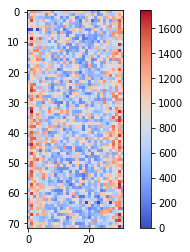

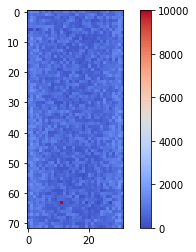

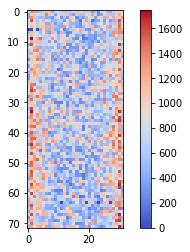

-----------------


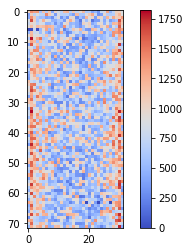

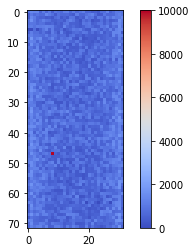

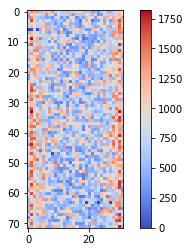

-----------------


In [4]:
for k in range(10):
    im=plt.imshow(input_images[k],cmap=cm.coolwarm)
    plt.colorbar()
    plt.show()
    plt.clf()

    im=plt.imshow(hotregion_image[k],cmap=cm.coolwarm)
    plt.colorbar()
    plt.show()
    plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
             #as opposed to plt.close which closes the window. If you are showing many images at a time without
             #closing the window it is better.
    
    im=plt.imshow(deadregion_image[k],cmap=cm.coolwarm)
    plt.colorbar()
    plt.show()
    plt.clf()
    print '-----------------'


In [5]:
sample= np.append(data_sample,hotregion_image,axis=0)
sample= np.append(sample,deadregion_image,axis=0)


print sample.shape

(2997, 72, 32)


For CNN
create the corresponding label matrices

In [6]:
X=np.copy(sample)

y=np.zeros((sample.shape[0],1))


In [7]:
#this is because I am only going to add the hot and dead region images

for i in range(2,0,-1):
    y[-i*input_images.shape[0]:]=3-i
#if you want it as intergers leave this as it is
#if you would like it as a vector then do this
y=to_categorical(y,3)
#print 'First few labels are \n',y[:5]
#print y.shape
#print 'Labels from 1 class to another are like this\n',y[998:1004]
#print 'Labels from 1 class to another are like this\n',y[1997:2004]


In [8]:
# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

print "X shape is: ",X.shape
print "y shape is: ",y.shape
# input image dimensions
img_rows, img_cols = X.shape[1],X.shape[2]

X shape is:  (2997, 72, 32)
y shape is:  (2997, 3)


Xtrain.shape (1798, 72, 32)
Xtest.shape (1199, 72, 32)
ytrain.shape (1798, 3)
ytest.shape (1199, 3)
Printing labels and their corresponding images
-------------------
[ 0.  1.  0.]


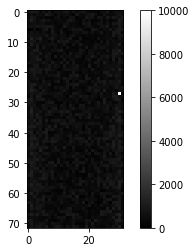

-------------------
[ 0.  1.  0.]


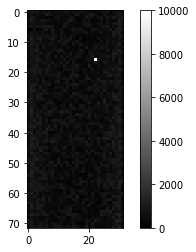

-------------------
[ 1.  0.  0.]


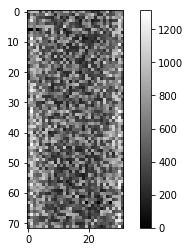

-------------------
[ 0.  1.  0.]


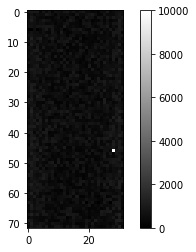

-------------------
[ 1.  0.  0.]


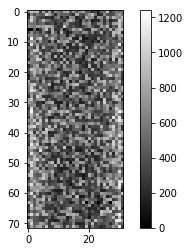

-------------------
[ 1.  0.  0.]


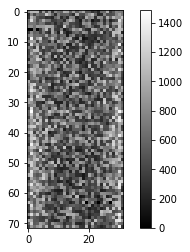

-------------------
[ 1.  0.  0.]


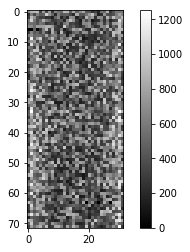

-------------------
[ 0.  0.  1.]


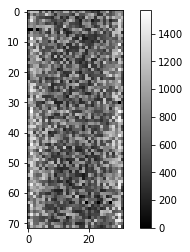

-------------------
[ 0.  1.  0.]


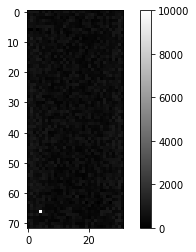

-------------------
[ 0.  1.  0.]


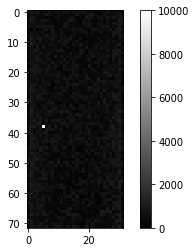

Xtrain.shape after if statement (1798, 72, 32, 1)
Xtest.shape after if statement (1199, 72, 32, 1)
ytrain.shape after if statement (1798, 3)
ytest.shape after if statement (1199, 3)


In [9]:

Xtrain, Xtest ,ytrain, ytest =train_test_split(X,y,test_size=.4,random_state =5 )

print 'Xtrain.shape',Xtrain.shape
print 'Xtest.shape',Xtest.shape
print 'ytrain.shape',ytrain.shape
print 'ytest.shape',ytest.shape
print 'Printing labels and their corresponding images'
    
for k in range(10):
    print'-------------------'
    print ytrain[k]
    im=plt.imshow(Xtrain[k],cmap=cm.gray)
    plt.colorbar()
    plt.show()
    plt.clf()


Xtrain, Xtest,input_shape= u.check_test_and_train_images_format(Xtrain, Xtest, img_rows, img_cols)

print 'Xtrain.shape after if statement',Xtrain.shape
print 'Xtest.shape after if statement',Xtest.shape
print 'ytrain.shape after if statement',ytrain.shape
print 'ytest.shape after if statement',ytest.shape
    


# Creating and training the model

In [10]:
model = Sequential([
Conv2D(10, kernel_size=(2, 2), activation='relu', strides=(1, 1),input_shape=input_shape),
MaxPooling2D(pool_size=(2,2)),
BatchNormalization(),
Conv2D(8, kernel_size=(3, 3), activation='relu', strides=(1, 1)),
MaxPooling2D(pool_size=(2,2)),
Conv2D(8,kernel_size=(1,1), activation='relu'),
Dropout(0.25),
Flatten(),

Dense(8,activation='relu'),
Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',#Adam(lr=1e-3),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 71, 31, 10)        50        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 15, 10)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 35, 15, 10)        40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 13, 8)         728       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 6, 8)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 6, 8)          72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 6, 8)          0         
__________

In [11]:
checkpointer = ModelCheckpoint(filepath='best_nbmodel_good_hot_dead.hdf5', verbose=2, save_best_only=True)
earlystop= EarlyStopping(monitor='val_loss', min_delta=0, patience=25 ,verbose=1, mode='auto')

history = model.fit(Xtrain,ytrain,epochs=250
                    ,verbose=2
                    ,validation_data=(Xtest,ytest)
                    ,shuffle=True
                    ,callbacks=[checkpointer,earlystop])

Train on 1798 samples, validate on 1199 samples
Epoch 1/250
Epoch 00001: val_loss improved from inf to 1.10188, saving model to best_nbmodel_good_hot_dead.hdf5
 - 8s - loss: 0.9444 - acc: 0.4466 - val_loss: 1.1019 - val_acc: 0.3261
Epoch 2/250
Epoch 00002: val_loss improved from 1.10188 to 0.77053, saving model to best_nbmodel_good_hot_dead.hdf5
 - 7s - loss: 0.8159 - acc: 0.5940 - val_loss: 0.7705 - val_acc: 0.6147
Epoch 3/250
Epoch 00003: val_loss improved from 0.77053 to 0.73506, saving model to best_nbmodel_good_hot_dead.hdf5
 - 7s - loss: 0.7552 - acc: 0.6034 - val_loss: 0.7351 - val_acc: 0.6355
Epoch 4/250
Epoch 00004: val_loss improved from 0.73506 to 0.71590, saving model to best_nbmodel_good_hot_dead.hdf5
 - 7s - loss: 0.7306 - acc: 0.6235 - val_loss: 0.7159 - val_acc: 0.6297
Epoch 5/250
Epoch 00005: val_loss improved from 0.71590 to 0.69909, saving model to best_nbmodel_good_hot_dead.hdf5
 - 8s - loss: 0.7122 - acc: 0.6118 - val_loss: 0.6991 - val_acc: 0.6305
Epoch 6/250
Epoc

Epoch 46/250
Epoch 00046: val_loss improved from 0.59690 to 0.59644, saving model to best_nbmodel_good_hot_dead.hdf5
 - 7s - loss: 0.5916 - acc: 0.6374 - val_loss: 0.5964 - val_acc: 0.6305
Epoch 47/250
Epoch 00047: val_loss did not improve
 - 7s - loss: 0.5906 - acc: 0.6374 - val_loss: 0.5972 - val_acc: 0.6305
Epoch 48/250
Epoch 00048: val_loss did not improve
 - 7s - loss: 0.5913 - acc: 0.6363 - val_loss: 0.5975 - val_acc: 0.6297
Epoch 49/250
Epoch 00049: val_loss did not improve
 - 7s - loss: 0.5909 - acc: 0.6374 - val_loss: 0.5983 - val_acc: 0.6297
Epoch 50/250
Epoch 00050: val_loss did not improve
 - 7s - loss: 0.5912 - acc: 0.6368 - val_loss: 0.5984 - val_acc: 0.6297
Epoch 51/250
Epoch 00051: val_loss did not improve
 - 7s - loss: 0.5905 - acc: 0.6368 - val_loss: 0.5989 - val_acc: 0.6297
Epoch 52/250
Epoch 00052: val_loss did not improve
 - 7s - loss: 0.5908 - acc: 0.6374 - val_loss: 0.5989 - val_acc: 0.6297
Epoch 53/250
Epoch 00053: val_loss did not improve
 - 7s - loss: 0.5908 -

Epoch 102/250
Epoch 00102: val_loss improved from 0.33474 to 0.33089, saving model to best_nbmodel_good_hot_dead.hdf5
 - 7s - loss: 0.3019 - acc: 0.9155 - val_loss: 0.3309 - val_acc: 0.9008
Epoch 103/250
Epoch 00103: val_loss did not improve
 - 7s - loss: 0.2940 - acc: 0.9171 - val_loss: 0.3435 - val_acc: 0.8991
Epoch 104/250
Epoch 00104: val_loss did not improve
 - 7s - loss: 0.2970 - acc: 0.9149 - val_loss: 0.3425 - val_acc: 0.8991
Epoch 105/250
Epoch 00105: val_loss did not improve
 - 7s - loss: 0.2934 - acc: 0.9160 - val_loss: 0.3460 - val_acc: 0.8999
Epoch 106/250
Epoch 00106: val_loss did not improve
 - 7s - loss: 0.2946 - acc: 0.9143 - val_loss: 0.3541 - val_acc: 0.8991
Epoch 107/250
Epoch 00107: val_loss improved from 0.33089 to 0.32084, saving model to best_nbmodel_good_hot_dead.hdf5
 - 7s - loss: 0.2918 - acc: 0.9155 - val_loss: 0.3208 - val_acc: 0.9049
Epoch 108/250
Epoch 00108: val_loss improved from 0.32084 to 0.31698, saving model to best_nbmodel_good_hot_dead.hdf5
 - 7s 

Epoch 163/250
Epoch 00163: val_loss did not improve
 - 7s - loss: 0.2739 - acc: 0.9177 - val_loss: 0.3191 - val_acc: 0.8949
Epoch 164/250
Epoch 00164: val_loss did not improve
 - 7s - loss: 0.2682 - acc: 0.9194 - val_loss: 0.3151 - val_acc: 0.8974
Epoch 165/250
Epoch 00165: val_loss did not improve
 - 7s - loss: 0.2675 - acc: 0.9182 - val_loss: 0.3088 - val_acc: 0.9008
Epoch 166/250
Epoch 00166: val_loss did not improve
 - 7s - loss: 0.2816 - acc: 0.9149 - val_loss: 0.2995 - val_acc: 0.9049
Epoch 167/250
Epoch 00167: val_loss did not improve
 - 7s - loss: 0.2831 - acc: 0.9160 - val_loss: 0.3205 - val_acc: 0.8941
Epoch 168/250
Epoch 00168: val_loss did not improve
 - 7s - loss: 0.2715 - acc: 0.9182 - val_loss: 0.3023 - val_acc: 0.9041
Epoch 169/250
Epoch 00169: val_loss did not improve
 - 7s - loss: 0.2748 - acc: 0.9182 - val_loss: 0.2971 - val_acc: 0.9033
Epoch 170/250
Epoch 00170: val_loss did not improve
 - 7s - loss: 0.2653 - acc: 0.9177 - val_loss: 0.3209 - val_acc: 0.8982
Epoch 17

Epoch 227/250
Epoch 00227: val_loss did not improve
 - 6s - loss: 0.2715 - acc: 0.9182 - val_loss: 0.2851 - val_acc: 0.9083
Epoch 228/250
Epoch 00228: val_loss improved from 0.28306 to 0.28213, saving model to best_nbmodel_good_hot_dead.hdf5
 - 7s - loss: 0.2576 - acc: 0.9210 - val_loss: 0.2821 - val_acc: 0.9099
Epoch 229/250
Epoch 00229: val_loss did not improve
 - 7s - loss: 0.2588 - acc: 0.9182 - val_loss: 0.2842 - val_acc: 0.9091
Epoch 230/250
Epoch 00230: val_loss did not improve
 - 7s - loss: 0.2585 - acc: 0.9205 - val_loss: 0.2847 - val_acc: 0.9099
Epoch 231/250
Epoch 00231: val_loss did not improve
 - 7s - loss: 0.2692 - acc: 0.9177 - val_loss: 0.2886 - val_acc: 0.9074
Epoch 232/250
Epoch 00232: val_loss did not improve
 - 7s - loss: 0.2653 - acc: 0.9171 - val_loss: 0.2839 - val_acc: 0.9099
Epoch 233/250
Epoch 00233: val_loss did not improve
 - 7s - loss: 0.2589 - acc: 0.9194 - val_loss: 0.2839 - val_acc: 0.9099
Epoch 234/250
Epoch 00234: val_loss did not improve
 - 7s - loss: 

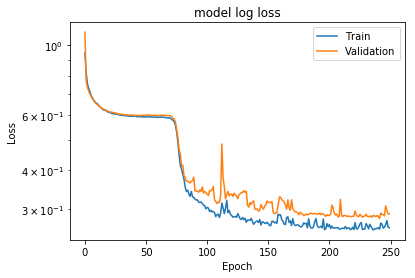

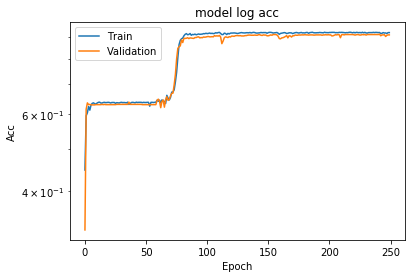

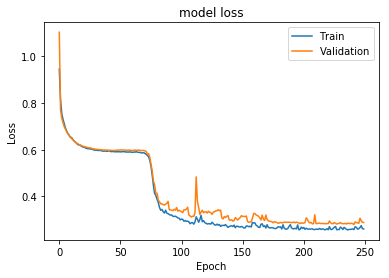

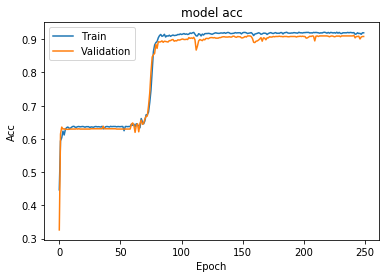

In [12]:
u.plot_loss(history, "model log loss","log")
u.plot_acc(history, "model log acc","log")

u.plot_loss(history, "model loss","linear")
u.plot_acc(history, "model acc","linear")



In [60]:
best_model= load_model(filepath='best_nbmodel_good_hot_dead.hdf5')


In [61]:
best_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 71, 31, 10)        50        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 15, 10)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 35, 15, 10)        40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 13, 8)         728       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 6, 8)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 6, 8)          72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 6, 8)          0         
__________

In [62]:
ypred=best_model.predict(Xtest)
ypredproba=best_model.predict_proba(Xtest)
#it's preferable to use .predict_classes because .predict might give probabilities 
#and not the label's in the case of multiclass
ypredclass=best_model.predict_classes(Xtest)

ypredclass=np.reshape(ypredclass,(ypredclass.shape[0],1))
#use argmax(1) to give the position of max value in a categorical variable like ytest
#it's basically a .predict_classes for ytest
ytestclass= ytest.argmax(1)
ytestclass=np.reshape(ytestclass,(ytestclass.shape[0],1))

In [63]:
np.all(ypredproba==ypred)
#this confirms my suspicions

True

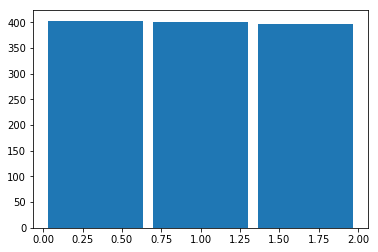

In [64]:
plt.hist(ytestclass,bins=3,range=None, density=None, weights=None,
         cumulative=False, bottom=None,
         histtype=u'bar', align=u'mid', orientation=u'vertical',rwidth=.9,
         log=False, color=None, label=None,
         stacked=False, normed=None, hold=None, data=None)
plt.show()

In [65]:
print ytestclass[40:50],'\n\n\n', ypredclass[40:50]

[[0]
 [1]
 [0]
 [0]
 [2]
 [0]
 [1]
 [1]
 [1]
 [2]] 


[[0]
 [1]
 [0]
 [0]
 [2]
 [0]
 [1]
 [1]
 [0]
 [0]]


In [66]:
# from categorial to lable indexing


#yprednotcategorical =ypred.argmax(1)
#print ytestnotcategorical
#print yprednotcategorical
#print metrics.accuracy_score(ytest,ypred)
confusion= metrics.confusion_matrix(ytestclass,ypredclass)

Confusion matrix, without normalization
[[403   0   0]
 [ 39 361   0]
 [ 67   0 329]]


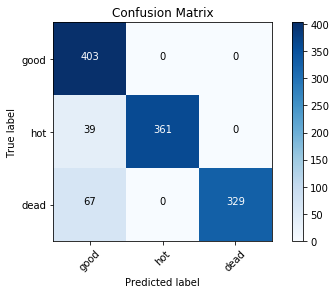

In [67]:
plotlabels=['good','hot','dead']
u.plot_confusion_matrix(confusion,plotlabels,title='Confusion Matrix')

# Now I'm going to measure and plot the ROC AUC

0.932244971757 For the label # 0
0.967906758448 For the label # 1
0.953092569531 For the label # 2


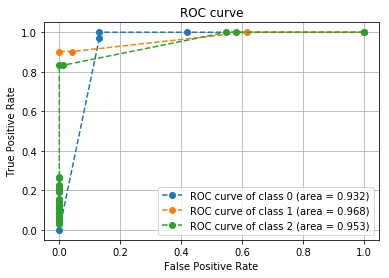

In [68]:
for i in range(3):
    fpr,tpr,thresholds= roc_curve(ytestclass,ypredproba[:,i],pos_label=i)
    
    
    roc_auc = auc(fpr, tpr)
    
    print roc_auc,'For the label #',i
    
    plt.plot(fpr,tpr,label="ROC curve of class {0} (area = {1:0.3f})"
             ''.format(i, roc_auc), linestyle='dashed',marker='o' )#,markerfacecolor='blue',markersize=12 ,color='green')
    #plt.xlim([-.1,1.5])
    #plt.ylim([-0.1,1.5])    
    plt.title('ROC curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    #plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
    plt.grid(True)
    

In [69]:
print thresholds

[  1.00000000e+00   9.99999881e-01   9.99999762e-01   9.99999642e-01
   9.99999523e-01   9.99999404e-01   9.99999166e-01   9.99999046e-01
   9.99998927e-01   9.99998450e-01   9.99998331e-01   9.99998212e-01
   9.99997973e-01   9.99997735e-01   9.99997616e-01   9.99997497e-01
   9.99997377e-01   9.99996781e-01   9.99996543e-01   9.99996424e-01
   9.99996066e-01   9.99991894e-01   9.99991655e-01   9.99990106e-01
   9.99989748e-01   9.99986410e-01   9.99986053e-01   9.99974966e-01
   9.99974132e-01   3.52016836e-01   1.24184445e-01   1.23515822e-01
   6.94916823e-37   0.00000000e+00]
